In [345]:
import pandas as pd 

In [346]:
from dotenv import load_dotenv
import os

In [347]:
# mysql connector 

import mysql.connector

# Load .env variables
load_dotenv()

# Read credentials from environment
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")


cnx = mysql.connector.connect (

 host=host,
    user=user,
    password=password,
    database=database

)

In [348]:
query = "SELECT * FROM banking_case.customer"

In [349]:
df = pd.read_sql(query,cux)

/var/folders/tm/vcz7ypds6b5gpns5q4zj32bc0000gn/T/ipykernel_37610/2505017980.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,cux)


In [350]:
cnx.close()

In [351]:
print(df)

     Client ID              Name  Age  Location ID Joined Bank  \
0     IND81288     Raymond Mills   24        34324  06-05-2019   
1     IND65833     Julia Spencer   23        42205  10-12-2001   
2     IND47499    Stephen Murray   27         7314  25-01-2010   
3     IND72498    Virginia Garza   40        34594  28-03-2019   
4     IND60181   Melissa Sanders   46        41269  20-07-2012   
...        ...               ...  ...          ...         ...   
2995  IND66827         Earl Hall   82         8760  09-10-2014   
2996  IND40556  Billy Williamson   44        32837  05-02-2009   
2997  IND72414      Victor Black   70        36088  29-12-2009   
2998  IND46652       Andrew Ford   56        24871  13-02-2006   
2999  IND40216        Amy Nguyen   79        38518  08-12-2005   

          Banking Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician IV   
1        Jonathan Hawkins     African            Software Consu

DATA CLEANING, PREP AND EDA


In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [353]:
df.head

<bound method NDFrame.head of      Client ID              Name  Age  Location ID Joined Bank  \
0     IND81288     Raymond Mills   24        34324  06-05-2019   
1     IND65833     Julia Spencer   23        42205  10-12-2001   
2     IND47499    Stephen Murray   27         7314  25-01-2010   
3     IND72498    Virginia Garza   40        34594  28-03-2019   
4     IND60181   Melissa Sanders   46        41269  20-07-2012   
...        ...               ...  ...          ...         ...   
2995  IND66827         Earl Hall   82         8760  09-10-2014   
2996  IND40556  Billy Williamson   44        32837  05-02-2009   
2997  IND72414      Victor Black   70        36088  29-12-2009   
2998  IND46652       Andrew Ford   56        24871  13-02-2006   
2999  IND40216        Amy Nguyen   79        38518  08-12-2005   

          Banking Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician IV   
1        Jonathan Hawkins     Afr

In [354]:
df.shape

(3000, 25)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [356]:
# produce summary statistics for the dataframe

df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [357]:
# converting numerical data to categorical data

bins =[0,100000, 300000, float('inf')]
labels = ['Low','Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels,right = False)

<Axes: xlabel='Income Band'>

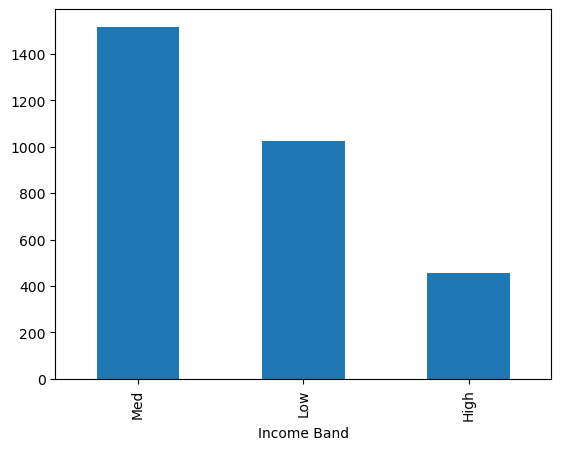

In [358]:
df['Income Band'].value_counts().plot(kind='bar')

In [359]:
print(df.columns)

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band'],
      dtype='object')


In [360]:
# inspect how categories are distributed across categorical columns

categorical_cols = df[["BRId", "GenderId", "Amount of Credit Cards", "Nationality",
                       "Occupation", "Fee Structure", "Loyalty Classification",
                       "Properties Owned", "Risk Weighting", "IAId", "Income Band"]].columns


for col in categorical_cols:
    print(f"Value Counts for '{col}'.")
    display(df[col].value_counts())

Value Counts for 'BRId'.


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId'.


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards'.


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality'.


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation'.


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure'.


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification'.


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned'.


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting'.


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'IAId'.


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Income Band'.


Income Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

# Univariate Analysis of Categorical Variables



We explored the distribution of all categorical variables in the dataset to understand the frequency of each category. 

For columns with many unique categories, only the top 10 most frequent categories were visualized to maintain readability. 

These countplots provide insights into:

Which categories dominate each feature
Potential imbalances or patterns that may influence further analysis
Features that may need grouping or preprocessing before modeling

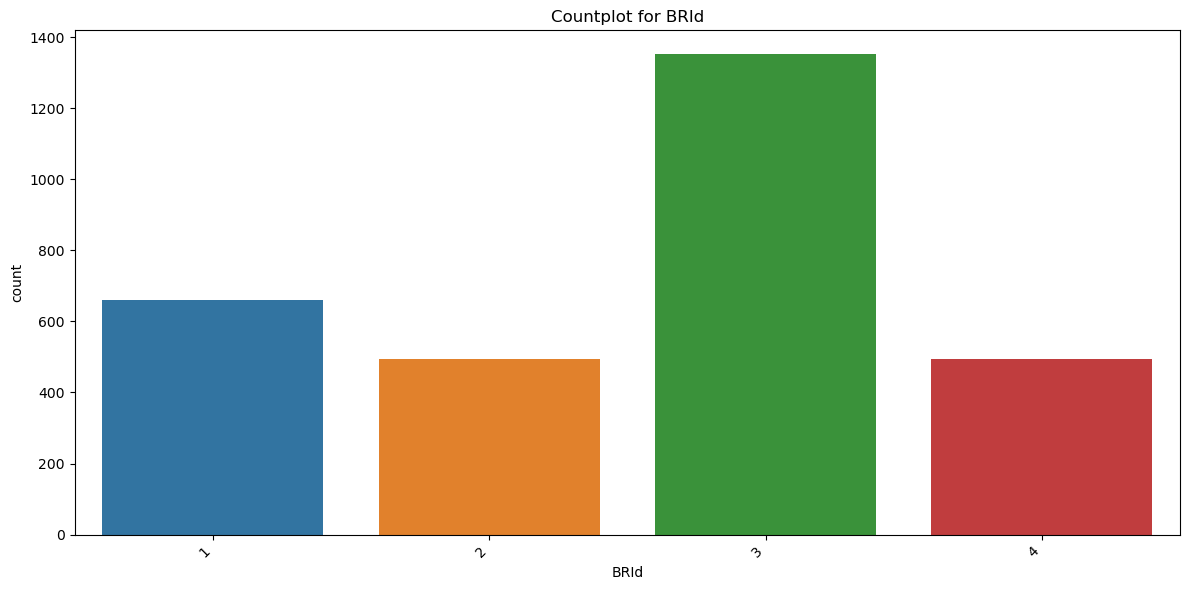

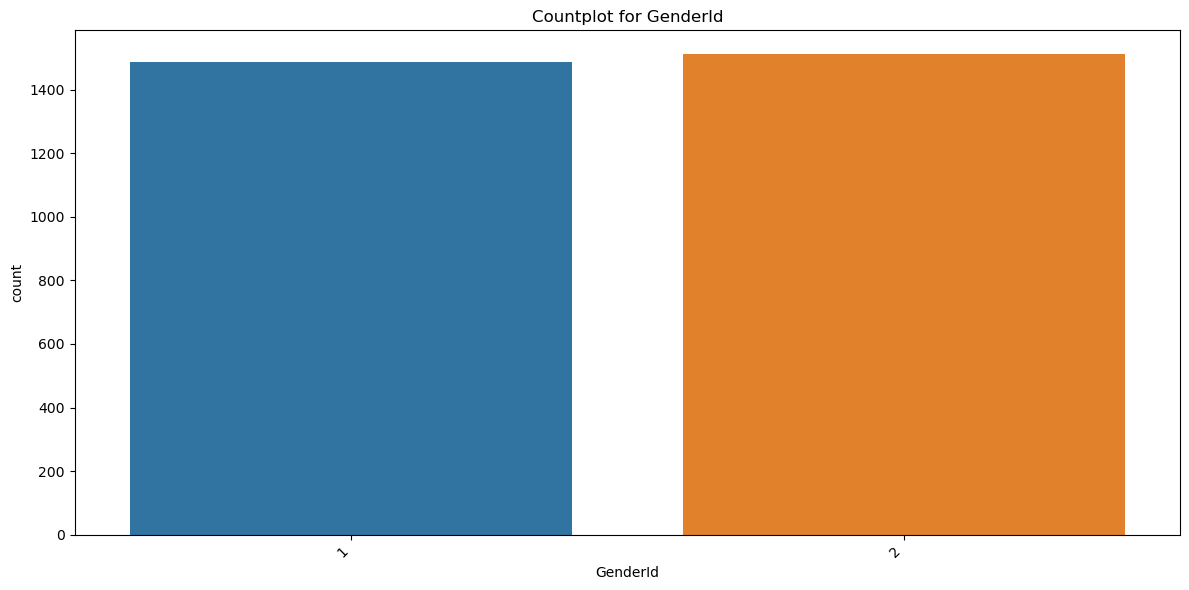

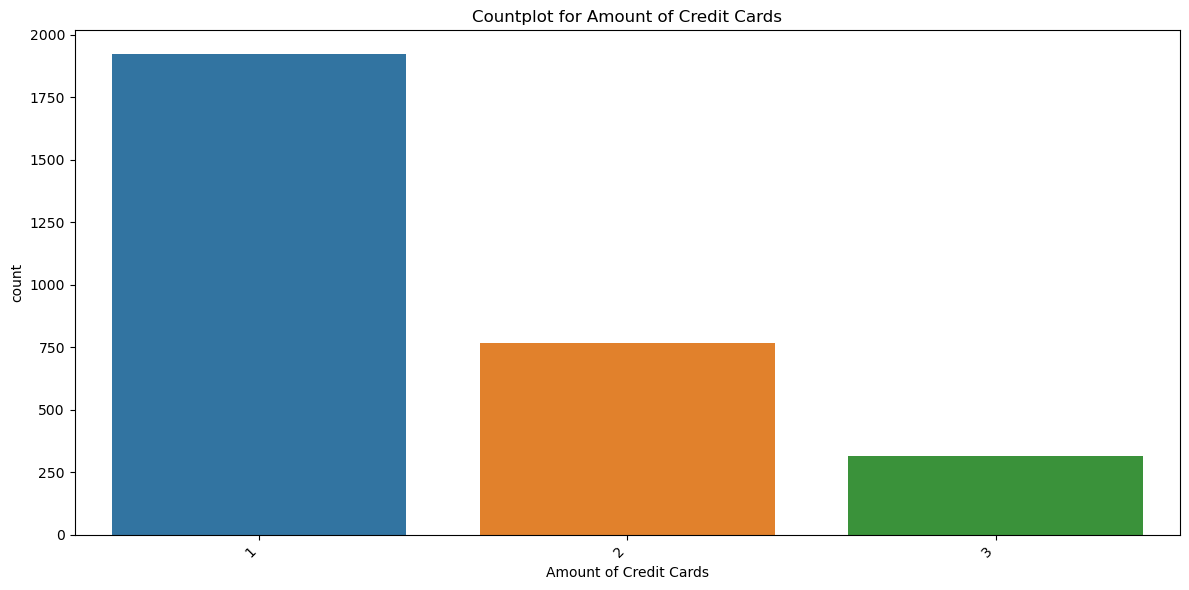

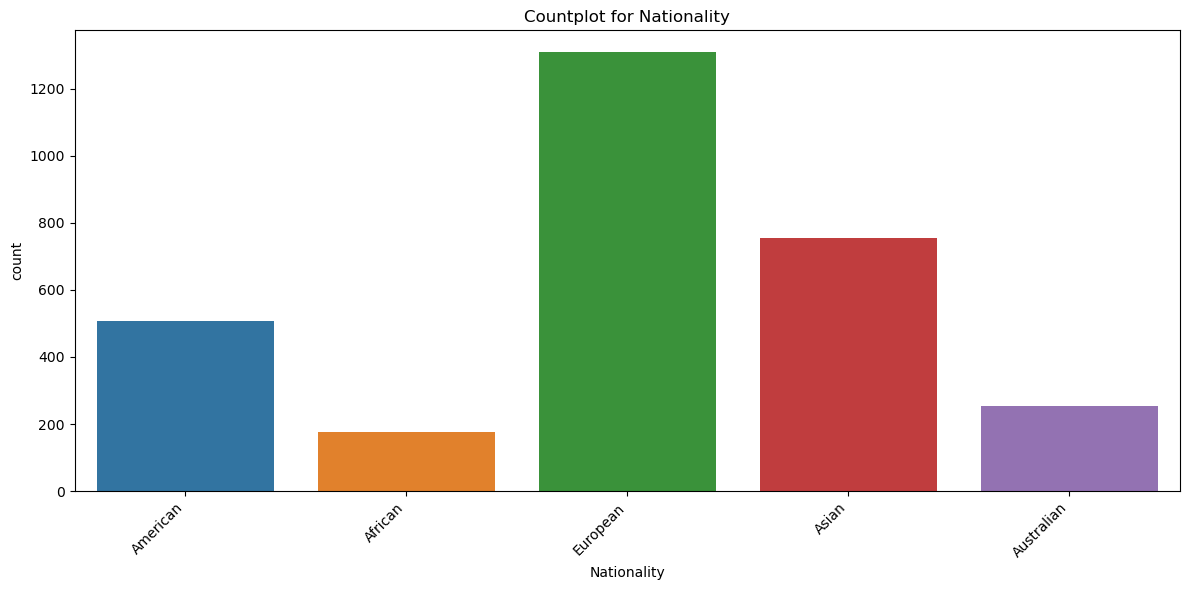

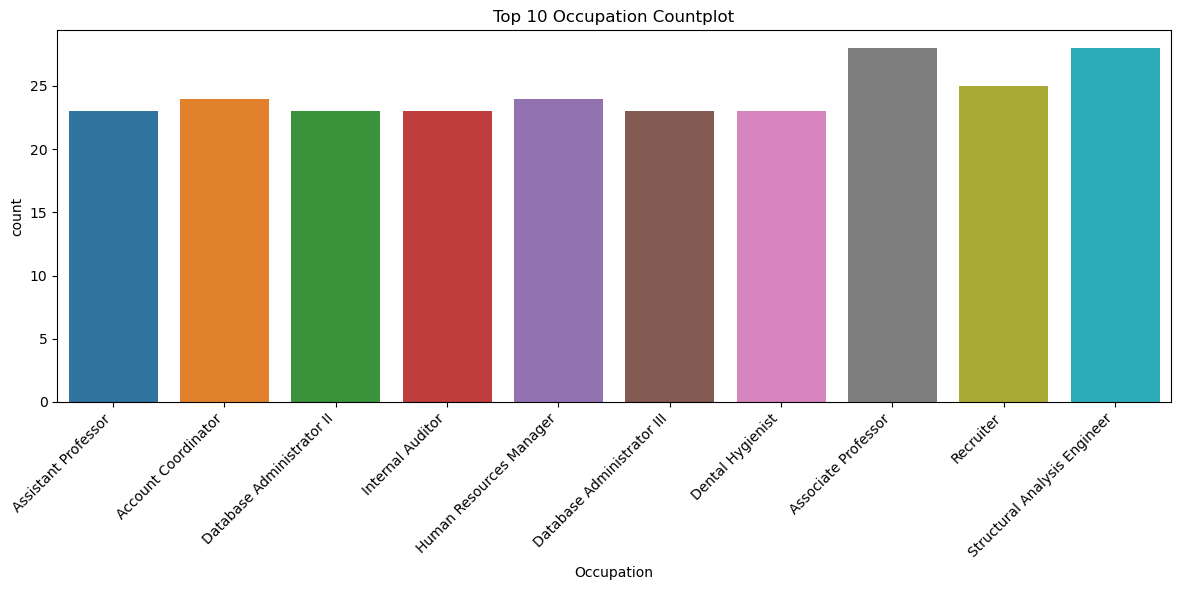

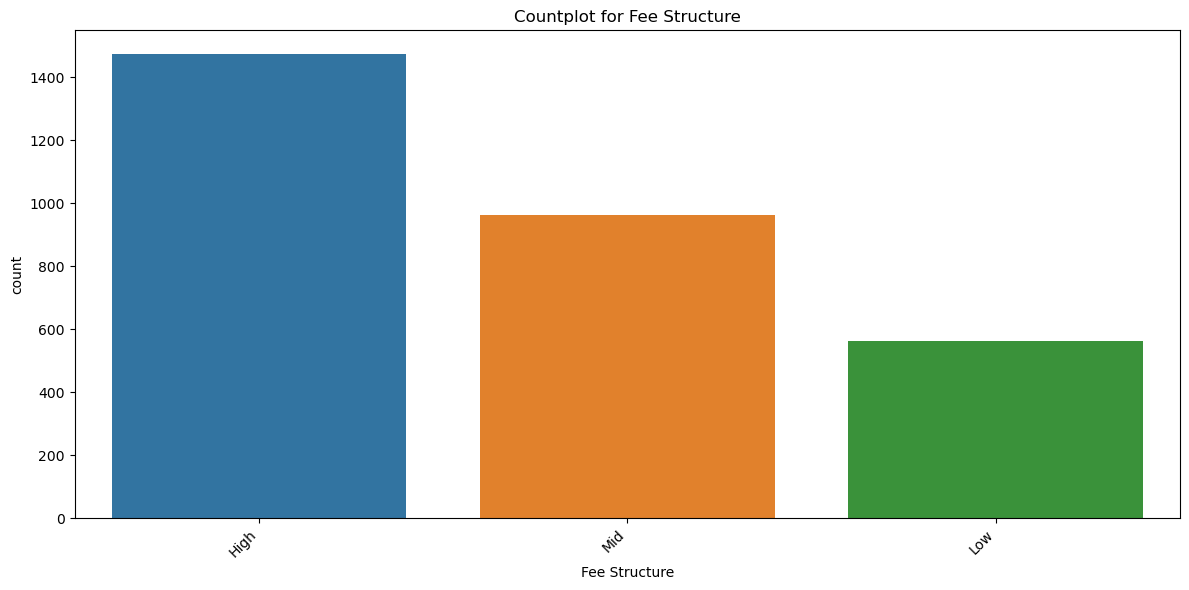

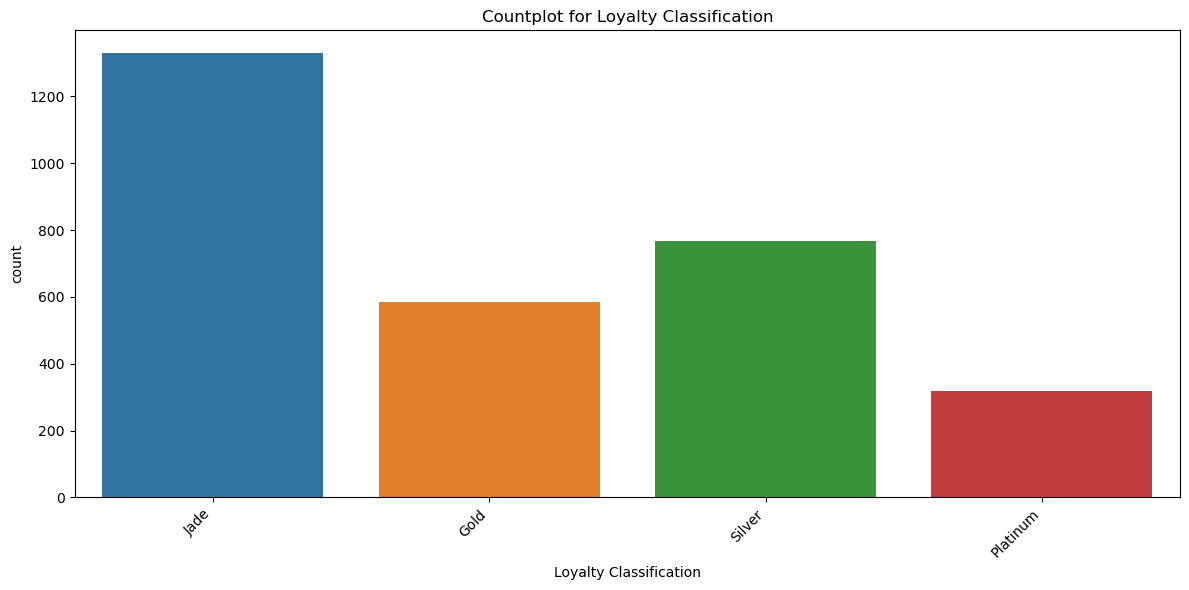

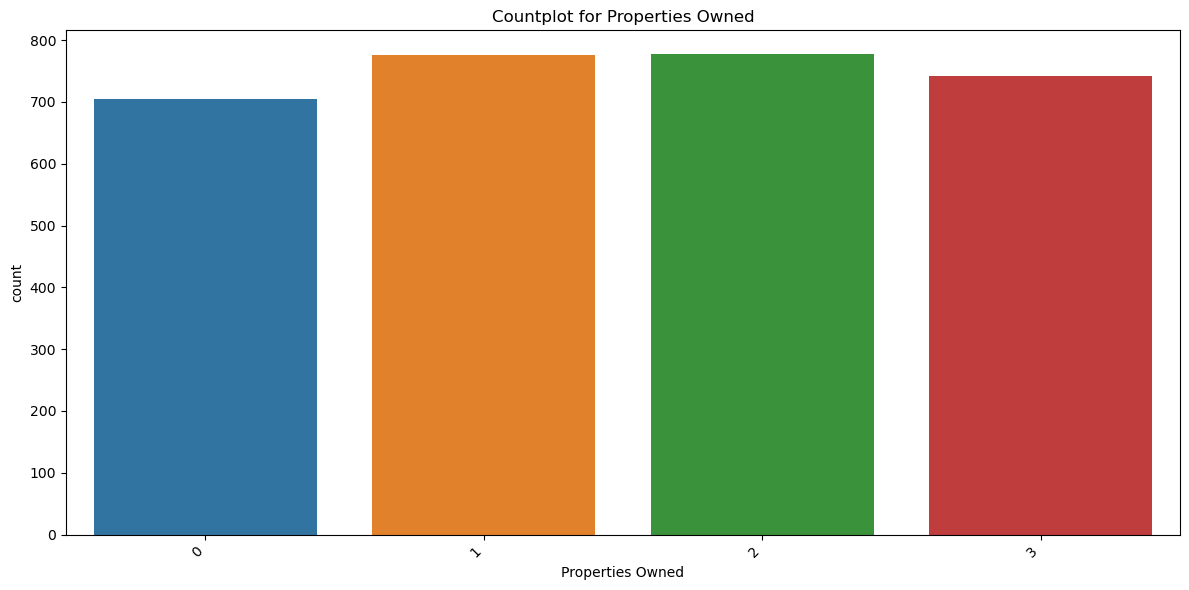

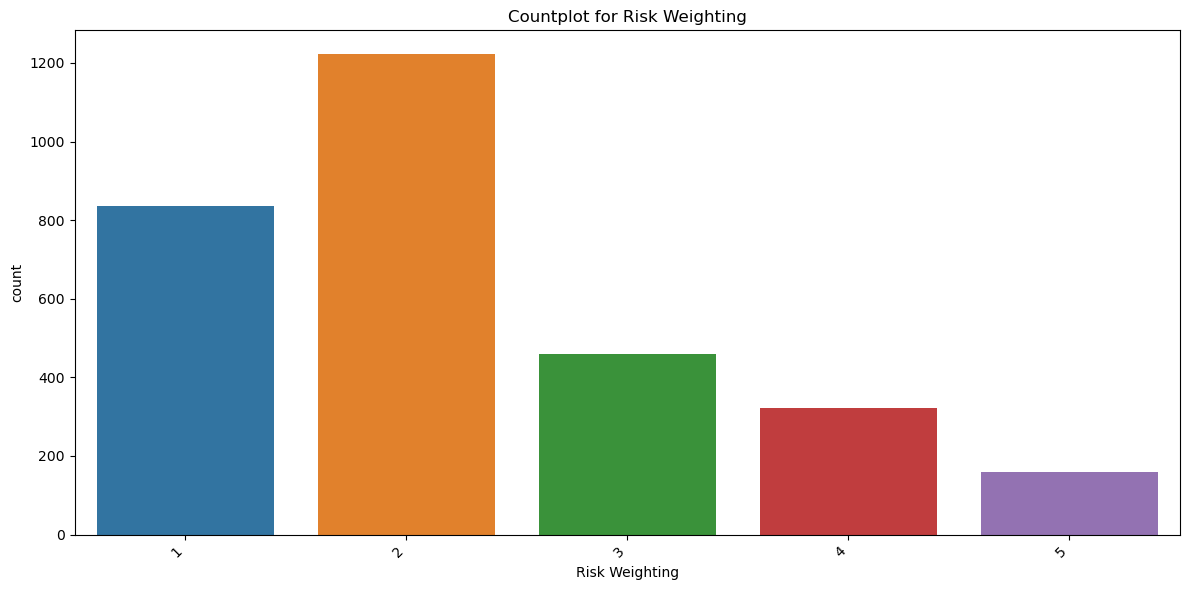

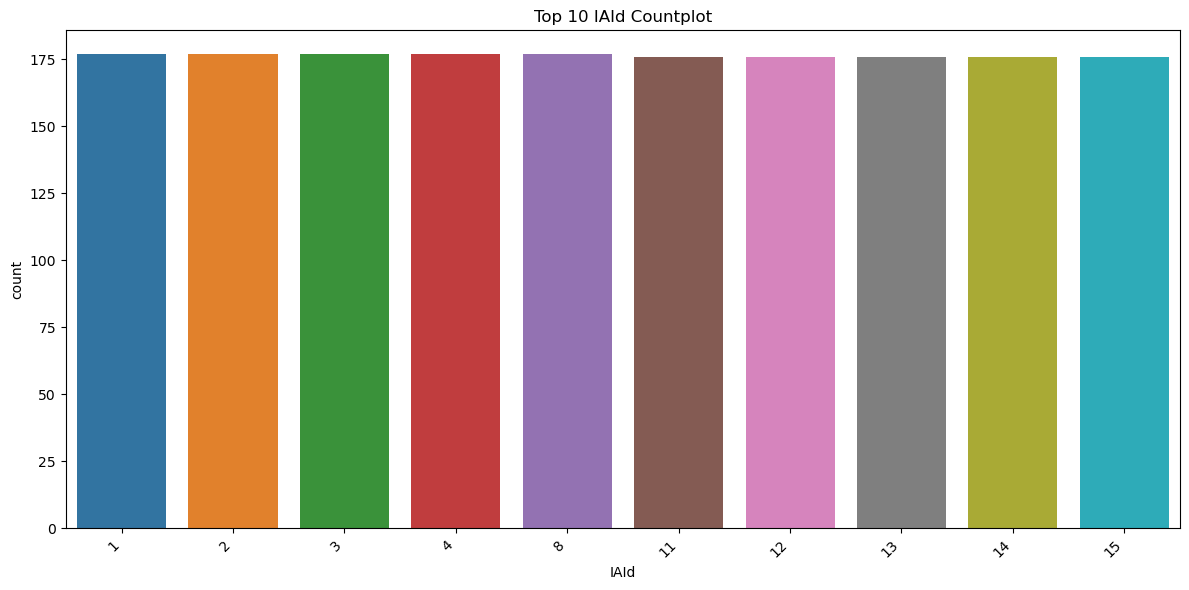

/Users/ruthdbz/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


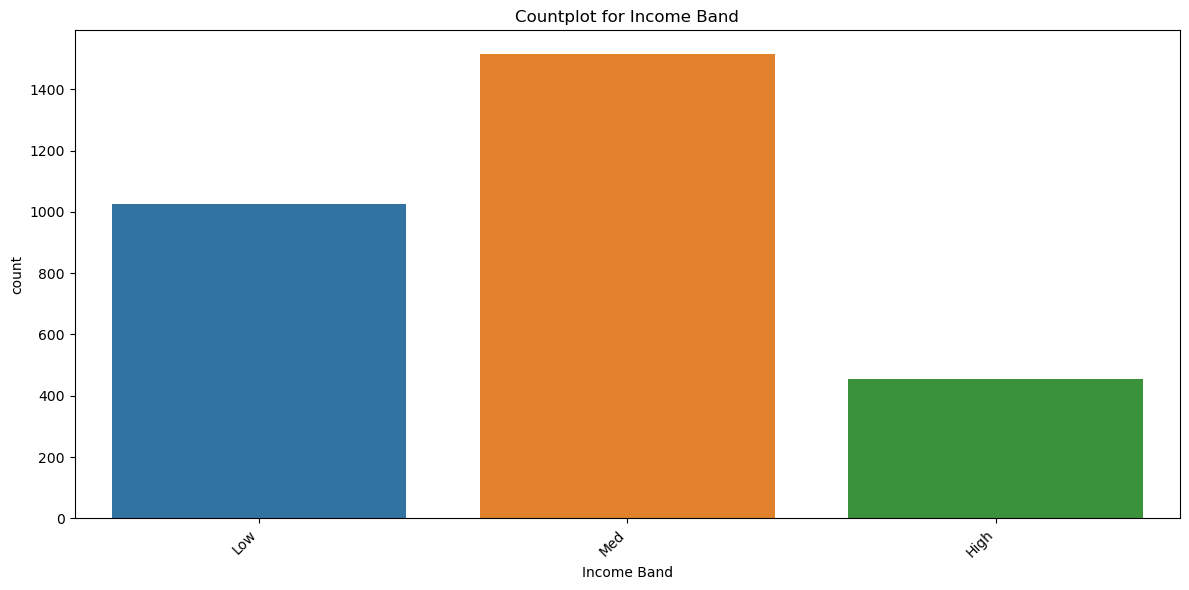

In [361]:


top_n = 10  

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(12,6))
    
    
    if df[col].nunique() > top_n:
        top_categories = df[col].value_counts().nlargest(top_n).index
        sns.countplot(data=df[df[col].isin(top_categories)], x=col)
        plt.title(f'Top {top_n} {col} Countplot')
    else:
        sns.countplot(data=df, x=col)
        plt.title(f'Countplot for {col}')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Bivariate Analysis

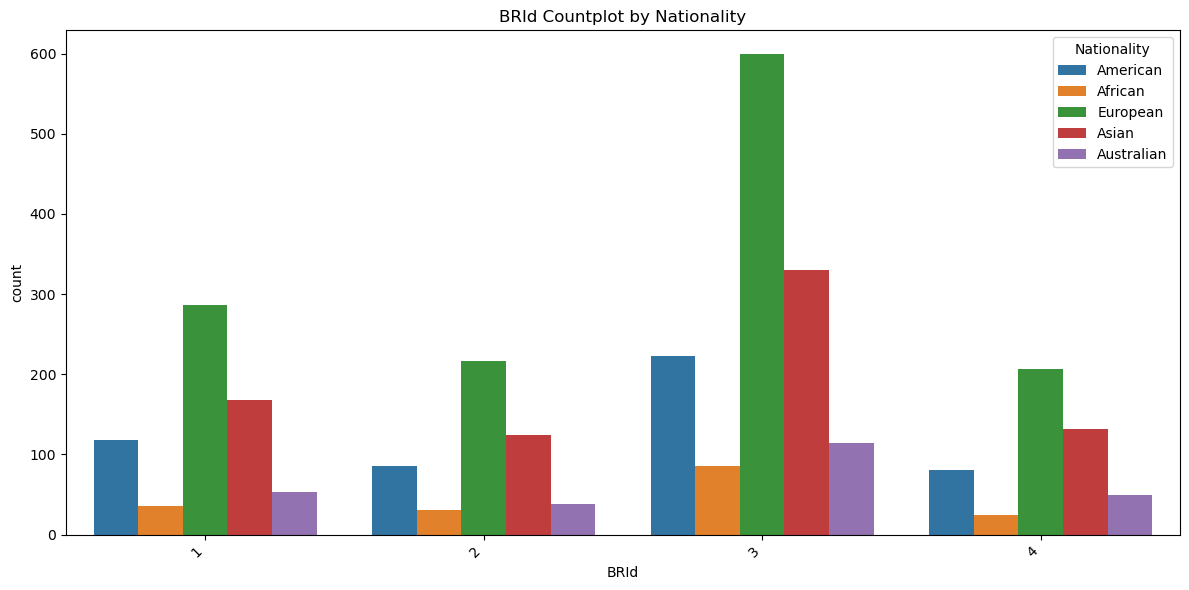

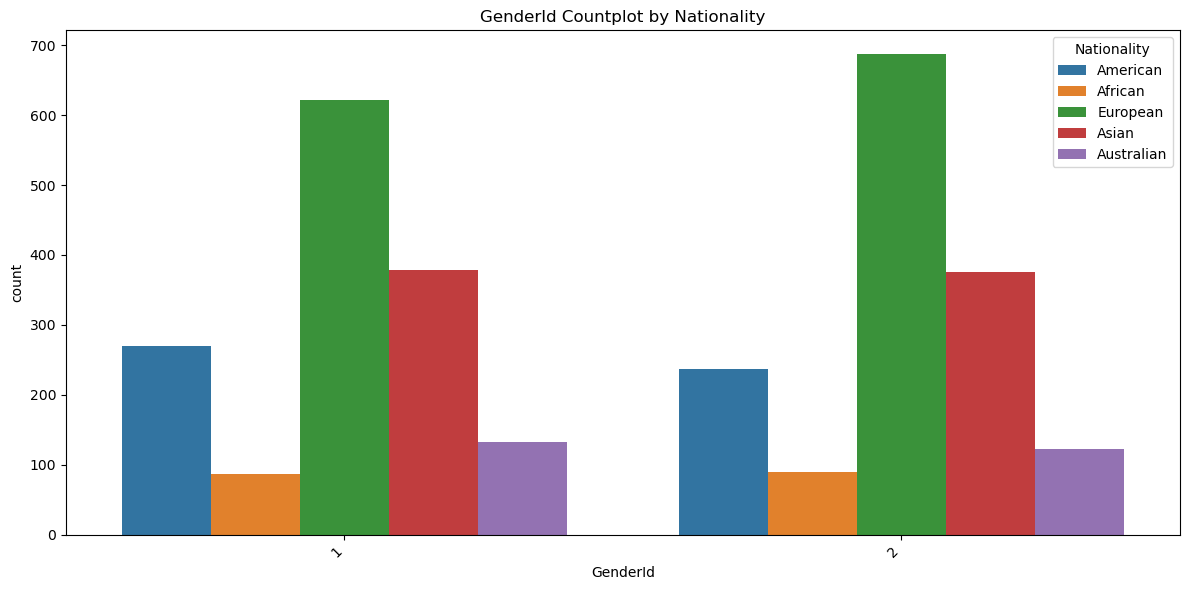

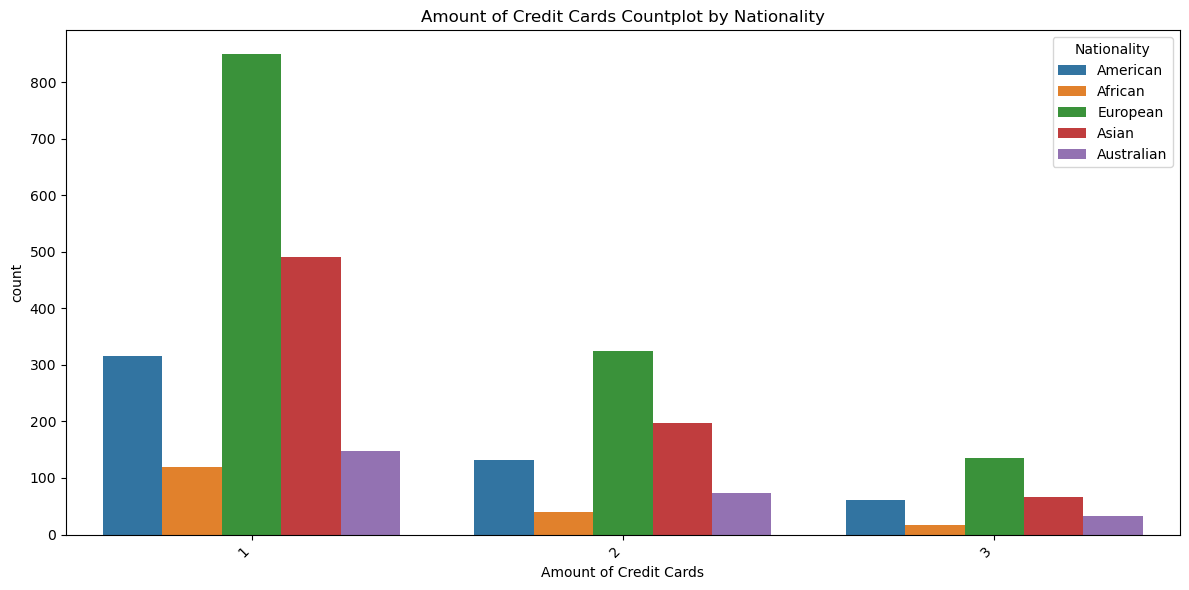

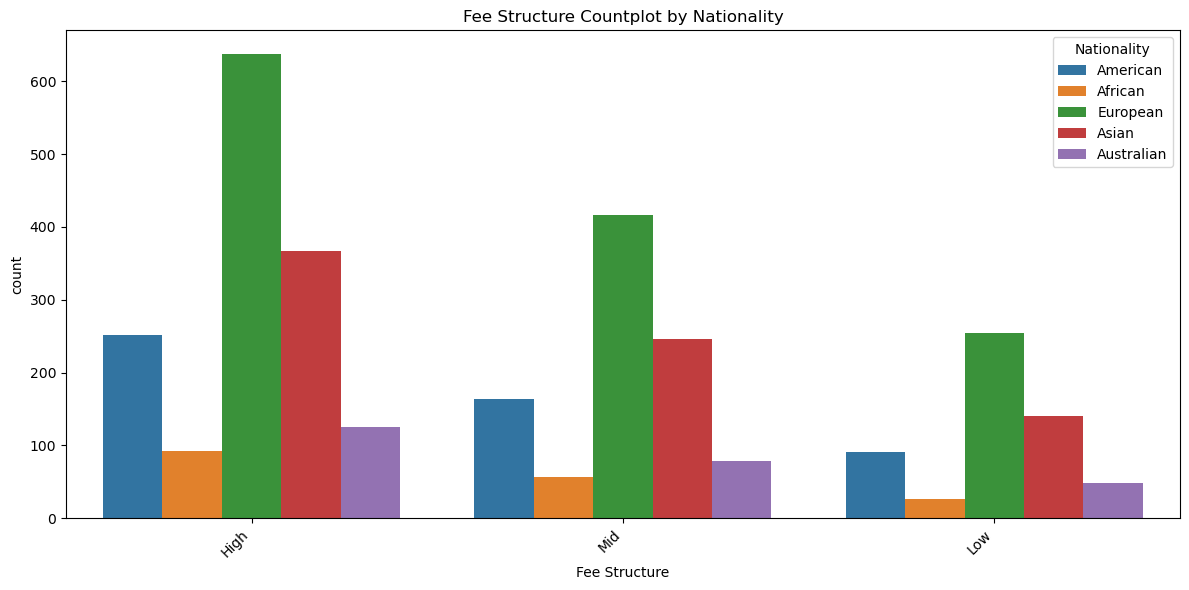

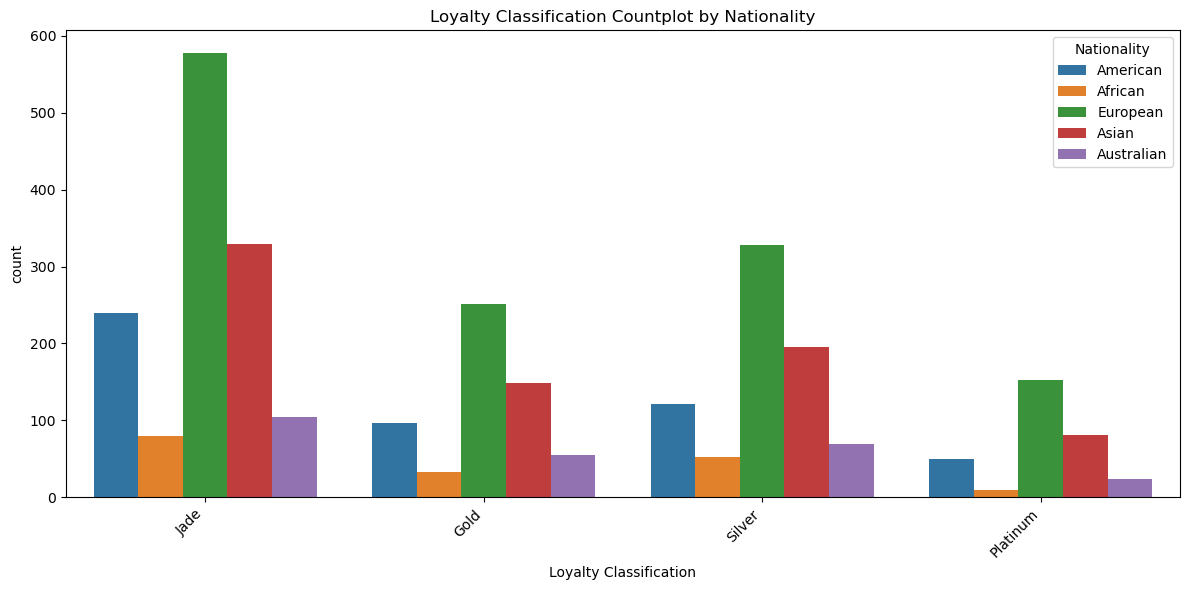

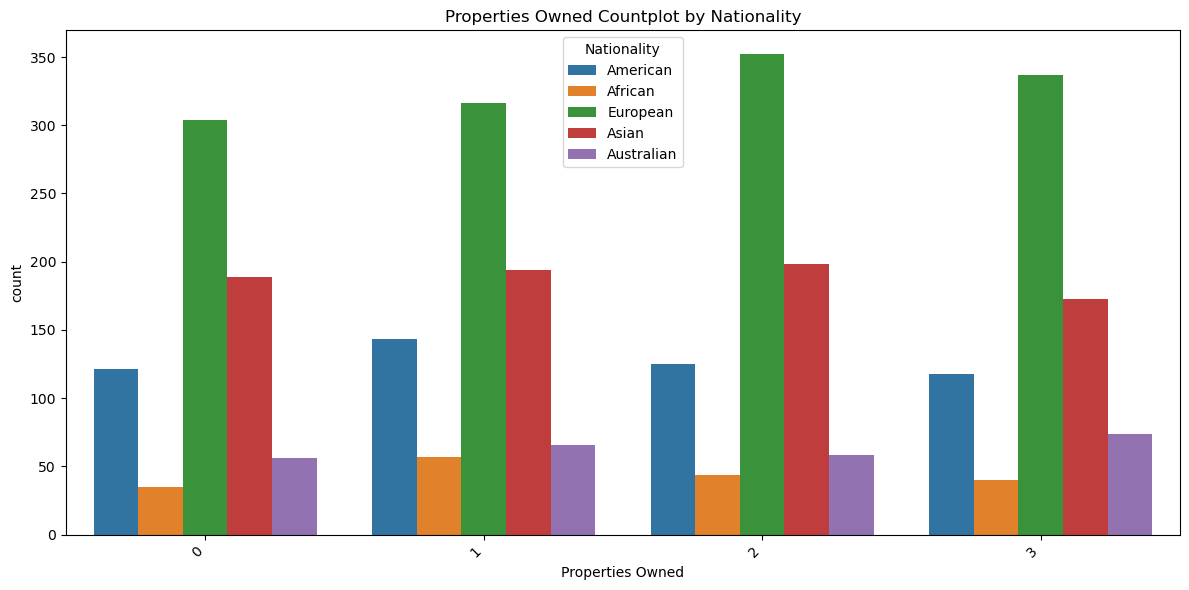

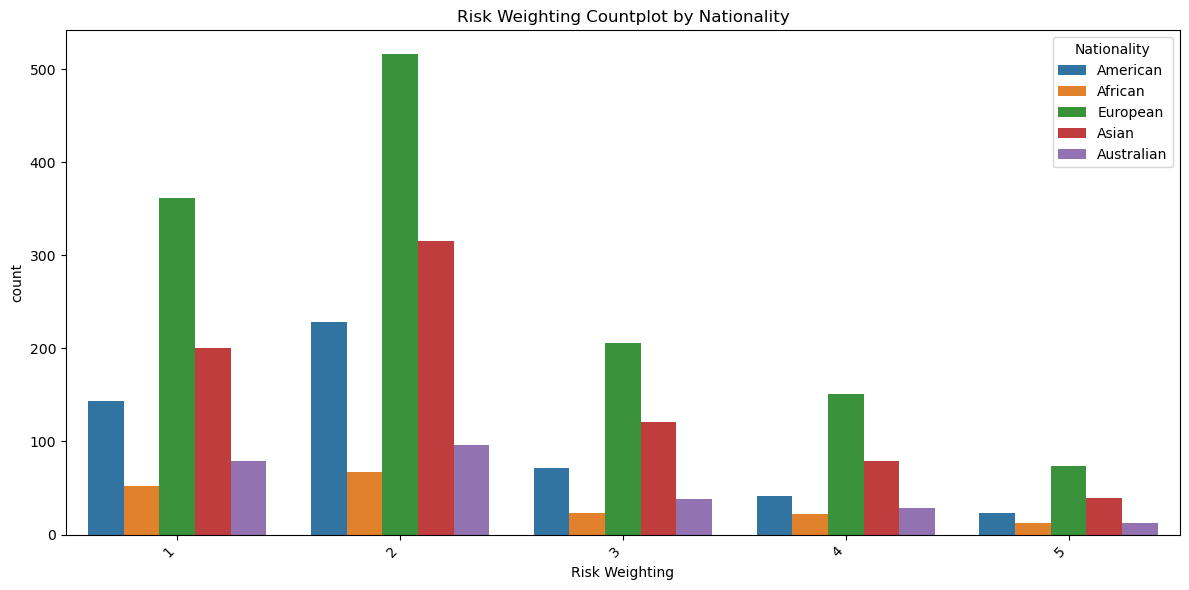

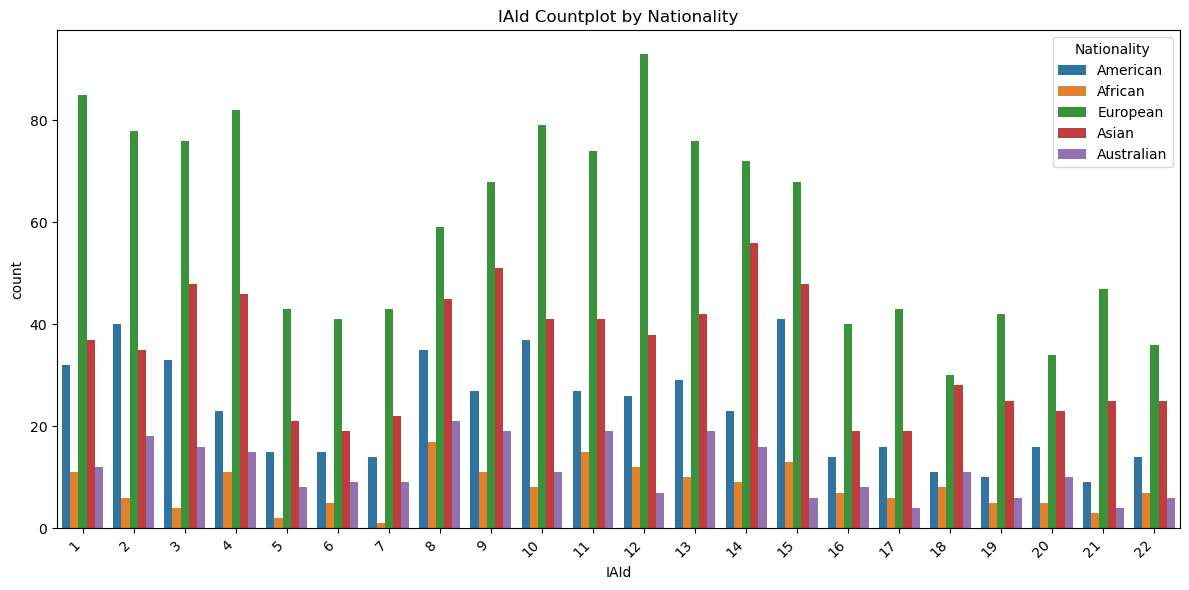

/Users/ruthdbz/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/ruthdbz/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


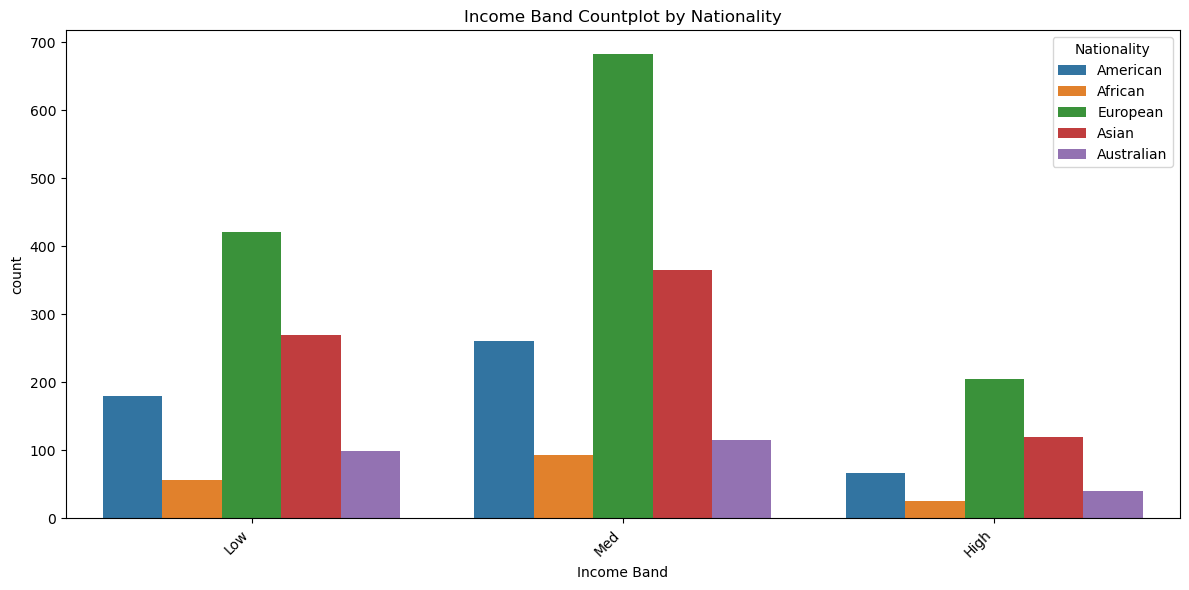

In [362]:

skip_cols = ["Nationality", "Occupation"]

for i, col in enumerate(categorical_cols):
    if col not in skip_cols:
        plt.figure(figsize=(12,6))
        sns.countplot(data=df, x=col, hue='Nationality')
        plt.title(f'{col} Countplot by Nationality')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Bivariate Analysis by Nationality


We explored how the distribution of categorical variables differs across nationalities. Key insights include:

Europeans hold significantly more credit cards than other nationalities, with 500 more than Americans, Africans, and Asians.

Africans have the fewest credit cards, while Asians have the second highest and Americans are third.

Europeans own the most properties, followed by Asians and then Americans.

Risk weighting is highest for Europeans compared to other nationalities.

# Numerical Analysis